# IMT 2860 - Introducción a Data Science

# Taller 0: Instalación y Testeo de Herramientas de Programación.


## 1. Objetivo.

Este Taller inicial tiene como objetivo probar la instalación y buen funcionamiento de las herramientas de programación que usaremos a lo largo del curso. Para ello, se entrega un código de prueba que ud. deberá correr en su ambiente de trabajo, y sobre el cual desarrollará de manera independiente algunos ejercicios sencillos  de programación.

La entrega del Taller debe hacerse en formato Jupyter Notebook (utilice este mismo archivo), a través de Canvas, hasta el día **jueves 31 de marzo a las 23:59 hrs.**

## 2. Herramientas Básicas para Ciencias de Datos.

Como vimos en clases, en este curso usaremos el lenguaje de programación Python, y un conjunto de librerías para manipulación, análisis, modelamiento y visualización de datos. 

Para la instalación de Python y sus librerías, es recomendable utilizar el ambiente Anaconda. Anaconda es una distribución libre y abierta de los lenguajes Python y R, utilizada en ciencia de datos, y aprendizaje automático. Esto incluye procesamiento de grandes volúmenes de información, análisis predictivo y cómputos científicos. Está orientado a simplificar el despliegue y administración de los paquetes de software. 

Las diferentes versiones de los paquetes se administran mediante el sistema de gestión de paquetes conda, el cual lo hace bastante sencillo de instalar, correr, y actualizar software de ciencia de datos y aprendizaje automático.

La distribución Anaconda es utilizada por 6 millones de usuarios e incluye más de 250 paquetes de ciencia de datos válidos para Windows, Linux y MacOS (Wikipedia).

En la Tabla a continuación, se indican las librerías a instalar, y los links donde puede descargarlas. Instale y pruebe en su computador el funcionamiento de los distintos paquetes siguiendo las instrucciones en cada link.

| Librería | URL | Comentario |
| :-  | :-  | :-  |
|Python|https://www.python.org/downloads/ |	Puede ser instalado a traves de Anaconda, se recomienda versión>3.6|
|Anaconda|	https://docs.continuum.io/anaconda/install/	|Incluye python, gestión de paquete conda, jupyter y pandas |
|Miniconda|	https://docs.conda.io/en/latest/miniconda.html	|Contiene Conda, requerirá instalar lo demás aparte|
|Jupyter Notebook|	https://jupyter.org/install	|Contenido en Anaconda |
|Pandas	|https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html	|Contenido en Anaconda|
|Geopandas|	https://geopandas.org/getting_started/install.html	|Instalar mediante conda, en caso de no funcionar, evaluar generar un ambiente virtual|
|Sklearn|	https://scikit-learn.org/stable/install.html	|Seguir instrucciones en URL |



## 3. Ejercicio de Prueba: Planificación de la Distribución de Vacunas en la Región Metropolitana.


### 3.1 Introducción.

Suponga el plausible caso en que el ministro de salud se enteró que usted ha comenzado sus estudios en el MIA UC y que se encuentra cursando el ramo IMT-3860. Fascinado por sus conocimientos en la ciencia de datos, el ministro busca su ayuda para el proceso de vacunación en la Región Metropolitana contra una misteriosa gripe surgida en Wakanda.

Específicamente, el ministro le solicita diseñar un plan de distribución y aplicación de vacunas que priorice a la población de mayor edad. Para ello, uds. cuenta con información censal, y con los siguientes lineamientos:

* Las vacunas se asignarán por zona censal tal que el total de vacunas se distribuirá en la proporción de personas pertenecientes al rango de edad prioritario por cada zona.

* Se cuenta con la capacidad de aplicar 50.000 vacunas diarias sin ninguna limitante logística.

* La vacuna consiste de 1 sola dosis y se aplica a todas la personas entre 0 y 100 años sin restricciones.

### 3.2 Objetivos Específicos.
 
Para generar el plan de distribución de vacunas, se requiere responder las siguientes preguntas:

**a)** A nivel regional, ¿cuántas personas hay por rango etario? Considere 10 categorías de edad, entre 0 y 100 años.  <br>
**b)** ¿Cuántos días se requerirán aproximadamente para completar la vacunación de cada rango etario? <br>
**c)** Genere un mapa donde se visualize la población por zona censal.<br>

**Tarea individual:**

**d)** ¿Cuántas dosis deben distribuirse **diariamente a cada zona censal** hasta completar la vacunación de toda la población? <br>
**e)** Genere un mapa de la cantidad de vacunas a distribuir a cada zona censal para el día 1 de la campaña de vacunación.

Por último se le solicita mostrar un mapa de calor de la cantidad a distribuir de vacunas por zona para el día 0 de vacunación y el día 300 


### 3.2 Datos.

Los datos disponibles para este desafío corresponden a la base de Microdatos y  cartografía del Censo 2017 para la región Metropolitana.

* Los dataset asociados son accesibles en el link : http://www.censo2017.cl/microdatos/ y contiene la documentación pertinente, incluyendo el significado de cada columna y el tipo de dato.
* Cada registro corresponde a una persona encuestada y viene asociada a su ubicación geográfica a diversas escalas (región, comuna, etc). El máximo nivel de desagregación espacial presente es la zona censal.

(Detalles en http://www.censo2017.cl/servicio-de-mapas/descargas/mapas/alcances-base-cartografica-censo2017.pdf)

* Para este ejercicio usaremos principalmente la columna P09 que contiene la edad de la persona censada. Más adelante utilizaremos las variables que dan forma a un identificador único a la zona censal.

Para efectos de este problema, asumiremos que el Censo es altamente preciso, y refleja adecuadamente la población actual.


### 3.3 Desarrollo del Problema.





Comenzaremos por importar las librerías usando alias comunes: 

In [3]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 35.8 MB/s 
     |████████████████████████████████| 16.7 MB 41.5 MB/s 


In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sklearn as sk

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Luego importamos los datos censales la región metropolitana, y realizaremos una exploración rápida de sus contenidos:

In [6]:
censo= pd.read_csv('/content/drive/MyDrive/MIA/IMT3860 - Introducción a Data Science/Clase 1/CensoRM.csv')

In [7]:
print(censo.columns)

Index(['REGION', 'PROVINCIA', 'COMUNA', 'DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',
       'NVIV', 'NHOGAR', 'PERSONAN', 'P07', 'P08', 'P09', 'P10', 'P10COMUNA',
       'P10PAIS', 'P11', 'P11COMUNA', 'P11PAIS', 'P12', 'P12COMUNA', 'P12PAIS',
       'P12A_LLEGADA', 'P12A_TRAMO', 'P13', 'P14', 'P15', 'P15A', 'P16',
       'P16A', 'P16A_OTRO', 'P17', 'P18', 'P19', 'P20', 'P21M', 'P21A',
       'P10PAIS_GRUPO', 'P11PAIS_GRUPO', 'P12PAIS_GRUPO', 'ESCOLARIDAD',
       'P16A_GRUPO', 'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R',
       'P10COMUNA_15R', 'P11COMUNA_15R', 'P12COMUNA_15R'],
      dtype='object')


In [8]:
len(censo.columns)

48

In [9]:
len(censo)

7112808

In [10]:
censo.head(10)

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,...,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R
0,13,136,13605,1,1,1,12952,1,1,1,...,998,998,15,98,13,136,13605,98,98,13110
1,13,136,13605,1,1,1,12952,1,1,2,...,998,998,17,98,13,136,13605,98,98,13101
2,13,136,13605,1,1,1,12952,1,1,3,...,998,998,3,98,13,136,13605,98,98,13119
3,13,136,13605,1,1,1,12952,1,1,4,...,998,998,0,98,13,136,13605,98,98,98
4,13,136,13605,1,1,1,12952,2,1,1,...,998,998,99,98,13,136,13605,98,98,13120
5,13,136,13605,1,1,1,12952,2,1,2,...,32,998,12,98,13,136,13605,98,98,98
6,13,136,13605,1,1,1,12952,3,1,1,...,998,998,14,98,13,136,13605,98,98,98
7,13,136,13605,1,1,1,12952,3,1,2,...,998,998,10,98,13,136,13605,98,98,13101
8,13,136,13605,1,1,1,12952,3,1,3,...,998,998,13,3,13,136,13605,98,98,98
9,13,136,13605,1,1,1,12952,3,1,4,...,998,998,15,98,13,136,13605,98,98,98


In [11]:
censo.iloc[:,10:20]

,P07,P08,P09,P10,P10COMUNA,P10PAIS,P11,P11COMUNA,P11PAIS,P12
0,1,1,38,1,98,998,2,98,998,2
1,2,2,40,1,98,998,2,98,998,2
2,5,2,9,1,98,998,2,98,998,2
3,5,2,0,1,98,998,1,98,998,1
4,1,1,87,1,98,998,2,98,998,2
...,...,...,...,...,...,...,...,...,...,...
7112803,5,2,16,2,98,998,9,98,214,8
7112804,5,2,11,2,98,998,9,98,214,8
7112805,1,2,56,1,98,998,2,98,998,2
7112806,5,2,27,1,98,998,2,98,998,2


In [12]:
print(censo['P09'].mean())
print(censo['P09'].std())
print(censo['P09'].max())

35.57046780961893
21.618606784468188
100


In [13]:
censo.describe()

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,...,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R
count,7112808.0,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06,...,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06,7112808.0,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06,7.112808e+06
mean,13.0,1.316860e+02,1.318071e+04,6.848050e+00,1.037046e+00,7.629210e+00,7.942280e+03,6.614957e+02,1.038195e+00,1.023925e+01,...,9.695542e+02,9.546899e+02,1.296657e+01,8.861778e+01,13.0,1.316860e+02,1.318071e+04,3.486193e+02,2.125598e+03,6.185914e+03
std,0.0,1.365989e+00,1.318389e+02,7.500279e+00,1.888735e-01,5.858784e+01,4.656874e+03,4.719126e+02,3.340558e-01,1.440519e+02,...,1.454805e+02,1.752997e+02,1.698564e+01,2.861335e+01,0.0,1.365989e+00,1.318389e+02,1.723552e+03,4.597233e+03,5.981836e+03
min,13.0,1.310000e+02,1.310100e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,13.0,1.310000e+02,1.310100e+04,9.800000e+01,9.800000e+01,9.800000e+01
25%,13.0,1.310000e+02,1.311100e+04,2.000000e+00,1.000000e+00,2.000000e+00,3.996000e+03,2.770000e+02,1.000000e+00,1.000000e+00,...,9.980000e+02,9.980000e+02,7.000000e+00,9.800000e+01,13.0,1.310000e+02,1.311100e+04,9.800000e+01,9.800000e+01,9.800000e+01
50%,13.0,1.310000e+02,1.312100e+04,5.000000e+00,1.000000e+00,3.000000e+00,7.857000e+03,5.940000e+02,1.000000e+00,2.000000e+00,...,9.980000e+02,9.980000e+02,1.200000e+01,9.800000e+01,13.0,1.310000e+02,1.312100e+04,9.800000e+01,9.800000e+01,6.101000e+03
75%,13.0,1.320000e+02,1.320100e+04,9.000000e+00,1.000000e+00,5.000000e+00,1.191700e+04,9.640000e+02,1.000000e+00,3.000000e+00,...,9.980000e+02,9.980000e+02,1.400000e+01,9.800000e+01,13.0,1.320000e+02,1.320100e+04,9.800000e+01,9.800000e+01,1.311000e+04
max,13.0,1.360000e+02,1.360500e+04,9.900000e+01,2.000000e+00,9.990000e+02,1.604800e+04,4.296000e+03,3.600000e+01,5.912000e+03,...,9.990000e+02,9.990000e+02,9.900000e+01,9.900000e+01,13.0,1.360000e+02,1.360500e+04,1.520100e+04,1.520200e+04,1.520200e+04


#### a)  A nivel regional, ¿cuántas personas hay por rango etario? Considere 10 categorías de edad, entre 0 y 100 años.  

Para trabajar con rangos, `matplotlib` cuenta con la posibilidad de generar y visualizar histogramas usando la función `plt.hist`. Además de esto, `numpy` puede generar las variables relevantes de un histograma (bins, frecuencia) para ser utilizada según sus necesidades, mediante la función `np.histogram`.

Text(0.5, 0, 'Edad')

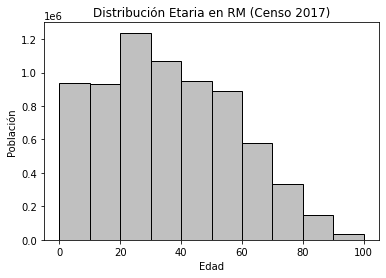

In [14]:
plt.hist(x=censo['P09'], bins=10,ec='k',color='silver')
plt.title('Distribución Etaria en RM (Censo 2017)')
plt.ylabel('Población')
plt.xlabel('Edad')

In [15]:
counts, bins = np.histogram(censo['P09'])

In [16]:
counts

array([ 937432,  933218, 1238583, 1066451,  951497,  889726,  579388,
        333994,  150451,   32068])

In [17]:
bins

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

#### b) ¿Cuántos días se requerirán aproximadamente para completar la vacunación de cada rango etario?

`Numpy` trabaja con objetos tipo `array`, que representa un arreglo multidimensional, homogéneo, con un número fijo de elementos. Este objeto puede operarse como un espacio vectorial (suma y multiplicación escalar). Por ejemplo, podemos calcular fácilmente la cantidad de días que tardará en completarse la vacunación de cada rango etáreo aplicando una división escalar:


In [18]:
pob_rango = counts
vac_dia = 50000

In [19]:
tiempo_rango = pob_rango/vac_dia 
print(tiempo_rango)

[18.74864 18.66436 24.77166 21.32902 19.02994 17.79452 11.58776  6.67988
  3.00902  0.64136]


#### c) Genere un mapa donde se visualize la población por zona censal.

Para visualizar los datos en su dimensión espacial, utilizaremos el objeto GeoDataFrame de la librería GeoPandas, que permite archivos de información espacial como el formato SHP (https://es.wikipedia.org/wiki/Shapefile).


In [20]:
zonas_censales=gpd.read_file('/content/drive/MyDrive/MIA/IMT3860 - Introducción a Data Science/Clase 1/Zona_Censal.shp')
zonas_censales.head()

,REGION,PROVINCIA,COMUNA,COD_DIS,COD_ZONA,NOM_REGION,NOM_PROVIN,NOM_COMUNA,NOM_URBANO,SHAPE_Leng,SHAPE_Area,geometry
0,13,131,13121,2.0,1.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.037389,0.000043,"POLYGON ((-70.65494 -33.47648, -70.65493 -33.4..."
1,13,131,13121,6.0,1.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.043592,0.000075,"POLYGON ((-70.68067 -33.47653, -70.68067 -33.4..."
2,13,131,13121,1.0,1.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.023065,0.000032,"POLYGON ((-70.67159 -33.47847, -70.67126 -33.4..."
3,13,131,13121,1.0,2.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.026531,0.000034,"POLYGON ((-70.67494 -33.47842, -70.67498 -33.4..."
4,13,131,13121,2.0,2.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.030756,0.000034,"POLYGON ((-70.65616 -33.47869, -70.65618 -33.4..."


In [21]:
type(zonas_censales.geometry[0])

shapely.geometry.polygon.Polygon

Text(0.5, 1.0, 'Zonas censales RM')

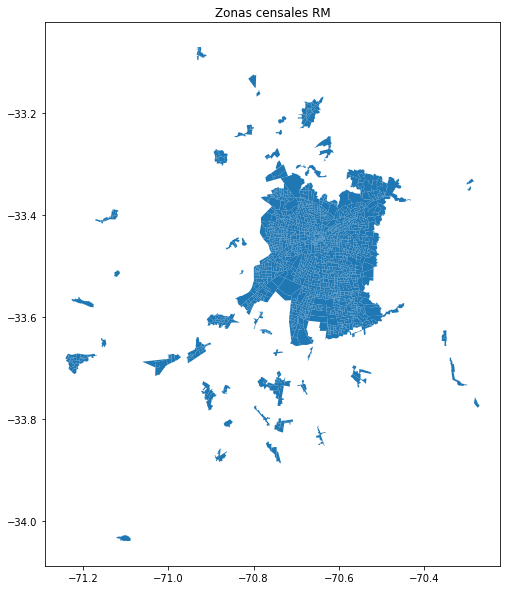

In [22]:
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
zonas_censales.plot(ax = ax)
plt.title('Zonas censales RM')

Para visualizar la población y tiempo de vacuna por zona censal, debemos agrupar la población por zonas censales.
Para resolver este problema, debemos agrupar la población por zonas censales. Para poder identificar cada zona de manera única, primero necesitamos generar un ID única, tanto para el DataFrame de microdatos como en el GeoDataframe.


In [23]:
idzona = censo['COMUNA'].astype(str)+censo['DC'].astype(str)+censo['ZC_LOC'].astype(str)
censo['ID_ZONA_U']= idzona

In [24]:
idzona_shp= zonas_censales['COMUNA'].astype(str)+zonas_censales['COD_DIS'].astype(int).astype(str)\
+zonas_censales['COD_ZONA'].astype(int).astype(str)
zonas_censales['ID_ZONA_U']= idzona_shp

A partir de los microdatos censales, calculamos la población total por zona censal, por ejemplo utilizando una tabla pivote:

In [25]:
pob_zona= pd.pivot_table(censo, index ='ID_ZONA_U', values = 'P09',aggfunc = 'count')
pob_zona

,P09
ID_ZONA_U,
13101101,2491
131011010,2930
13101102,1820
13101103,2768
13101104,2423
...,...
1360535,4093
1360536,4845
1360537,3715


In [26]:
pob_zona=pob_zona.rename(columns= {"P09" : "POPULATION"})
pob_zona.rename_axis(None, axis= 1).reset_index()

,ID_ZONA_U,POPULATION
0,13101101,2491
1,131011010,2930
2,13101102,1820
3,13101103,2768
4,13101104,2423
...,...,...
2351,1360535,4093
2352,1360536,4845
2353,1360537,3715
2354,1360538,235


In [27]:
zonas_censales0 = zonas_censales.merge(pob_zona, on ='ID_ZONA_U')
zonas_censales0.head()

,REGION,PROVINCIA,COMUNA,COD_DIS,COD_ZONA,NOM_REGION,NOM_PROVIN,NOM_COMUNA,NOM_URBANO,SHAPE_Leng,SHAPE_Area,geometry,ID_ZONA_U,POPULATION
0,13,131,13121,2.0,1.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.037389,0.000043,"POLYGON ((-70.65494 -33.47648, -70.65493 -33.4...",1312121,1903
1,13,131,13121,6.0,1.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.043592,0.000075,"POLYGON ((-70.68067 -33.47653, -70.68067 -33.4...",1312161,5990
2,13,131,13121,1.0,1.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.023065,0.000032,"POLYGON ((-70.67159 -33.47847, -70.67126 -33.4...",1312111,3659
3,13,131,13121,1.0,2.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.026531,0.000034,"POLYGON ((-70.67494 -33.47842, -70.67498 -33.4...",1312112,4565
4,13,131,13121,2.0,2.0,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,0.030756,0.000034,"POLYGON ((-70.65616 -33.47869, -70.65618 -33.4...",1312122,4473


Text(48.5, 0.5, 'Longitud')

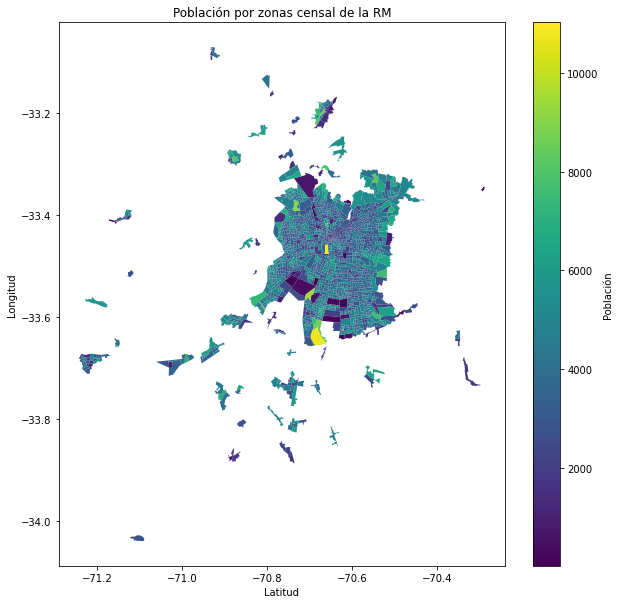

In [28]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
zonas_censales0.plot(ax= ax, figsize=(15, 10), column='POPULATION', legend=True, legend_kwds={'label': "Población"})
ax.set_title('Población por zonas censal de la RM')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')

**TAREA**:

**d) ¿Cuántas dosis deben distribuirse *diariamente a cada zona censal* hasta completar la vacunación de toda la población?**

**e) Genere un mapa de la cantidad de vacunas a distribuir a cada zona censal para el día 1 de la campaña de vacunación.**

Para resolver este problema, se requiere generar una función que asigne vacunas de acuerdo a las siguientes reglas:

- El total de vacunas disponible por día para toda la RM es de 50.000. 
- Si hay mas población de interés que vacunas, asignamos las vacunas de manera proporcional a la población por zona censal, y contabilizamos la población que falta por vacunar.
- Si hay más vacunas que población de interés, asignamos todas las vacunas necesarias a cada censal para completar la vacunación del rango etáreo correspondiente, y contabilizamos la cantidad de vacunas sobrantes. Estas vacunas sobrantes son asignadas al siguiente rango etáreo. 
- Para simplificar el proceso, considere que para un día determinado, en todas las zonas censales se debe estar vacunando el mismo rángo etáreo (es decir, si una zona censal completó la vacunación del rango correspondiente a ese día, espera hasta que comience la vacunación del rango siguiente).

El objetivo, es generar un dataframe que contenga la cantidad de vacunas que se le debe asignar a cada zona cada día. Con este dataframe, será sencillo generar el mapa solicitado en el punto e).


In [29]:
censo['rango_etario']=pd.cut(censo['P09'],10,precision=0)
pob_zona_rango_etario= pd.pivot_table(censo, index =['ID_ZONA_U','rango_etario'], values = 'P09',aggfunc = 'count').rename(columns= {"P09" : "POPULATION"}).reset_index()
pob_zona_rango_etario[['min_rango','max_rango']]=pob_zona_rango_etario['rango_etario'].astype(str).str.replace('\(|\]','').str.split(',',expand=True)
pob_zona_rango_etario['min_rango']=pob_zona_rango_etario['min_rango'].astype(float).astype(int)
pob_zona_rango_etario['max_rango']=pob_zona_rango_etario['max_rango'].astype(float).astype(int)
pob_zona_rango_etario.query('POPULATION>0',inplace=True)
zonas_censales01 = zonas_censales.merge(pob_zona_rango_etario, on ='ID_ZONA_U',how='outer')
zonas_censalesNA=zonas_censales01.loc[zonas_censales01.REGION.isna(),'POPULATION'].sum() #parte de la poblacion que no es encotrada en ninguna zona censal
zonas_censales1=zonas_censales01.loc[zonas_censales01.REGION.notna()]
T=[]
dias=1
for i in range(100,0,-10):
  zonas_censales2=zonas_censales1.loc[zonas_censales1.max_rango==i].eval('densidad=POPULATION/SHAPE_Area').sort_values(by=['densidad'],ascending=False).reset_index(drop=True)
  X=pd.concat([zonas_censales2.ID_ZONA_U,zonas_censales2.max_rango,zonas_censales2.POPULATION.cumsum()//50000+dias,zonas_censales2.POPULATION.cumsum()%50000,zonas_censales2.POPULATION],axis=1)
  X.columns=['ID_ZONA_U','max_rango','dia','pob_fact','poblacion']
  varbol=X.dia.diff().fillna(0)>0
  Y=X.loc[varbol].copy()
  Y['dia']-=1
  Y['pob_fact']=Y['poblacion']-Y['pob_fact']
  Y1=X.loc[varbol,['ID_ZONA_U','max_rango','dia','pob_fact']].copy()
  Z=pd.concat([Y[['ID_ZONA_U','max_rango','dia','pob_fact']].rename(columns={'pob_fact':'pob_vac'}),Y1.rename(columns={'pob_fact':'pob_vac'}),X.loc[~varbol,['ID_ZONA_U','max_rango','dia','poblacion']].rename(columns={'poblacion':'pob_vac'})],axis=0)
  T+=[Z]
  dias=Z.dia.max()+1
F=pd.concat(T,axis=0).reset_index()
#zonas_censales01 = zonas_censales1.merge(Z, on ='ID_ZONA_U')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


Cantidad de poblacion sin zona censal es de:

In [30]:
zonas_censalesNA

276443.0

d) ¿Cuántas dosis deben distribuirse diariamente a cada zona censal hasta completar la vacunación de toda la población?

__R:__ En la siguiente tabla, se puede ver la cantidad de vacunas (**poblacion vacunada**) por dia y por zona censal (**ID_ZONA_U**) 

In [31]:
F[['ID_ZONA_U','dia','pob_vac']].groupby(['ID_ZONA_U','dia']).sum().reset_index().rename(columns={'pob_vac':'poblacion vacunada'})

,ID_ZONA_U,dia,poblacion vacunada
0,13101101,1.0,20.0
1,13101101,2.0,65.0
2,13101101,5.0,126.0
3,13101101,12.0,139.0
4,13101101,25.0,227.0
...,...,...,...
18459,1360537,54.0,589.0
18460,1360537,75.0,567.0
18461,1360537,101.0,520.0
18462,1360537,120.0,545.0


**e) Genere un mapa de la cantidad de vacunas a distribuir a cada zona censal para el día 1 de la campaña de vacunación.**

**R:**

In [32]:
!pip install plotly

In [38]:
import plotly.express as px
zonas_censales3=zonas_censales.merge(F, on ='ID_ZONA_U').rename(columns={'pob_vac':'poblacion vacunada'})
zonas_censales4=zonas_censales3.loc[zonas_censales3.dia==1]
c=zonas_censales4['geometry'].total_bounds
fig = px.choropleth_mapbox(zonas_censales4,
                           geojson=zonas_censales4.geometry,
                           locations=zonas_censales4.index,
                           color='poblacion vacunada',
                           animation_frame="dia",
                           center={"lat": c[[1,3]].mean(), "lon": c[[0,2]].mean()},
                           mapbox_style="open-street-map")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**OBS:** Tambien se puede poner la animacion y viendo la evolucion por dia, cambiando **zonas_censales4** por **zonas_censales3** en el grafico de **plotly**, pero esta animacion demora mucho en rendersarse.